In [1]:
import yfinance as yf
from arch import arch_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock = yf.Ticker('NVDA')
volatility_data = stock.history(period='max')

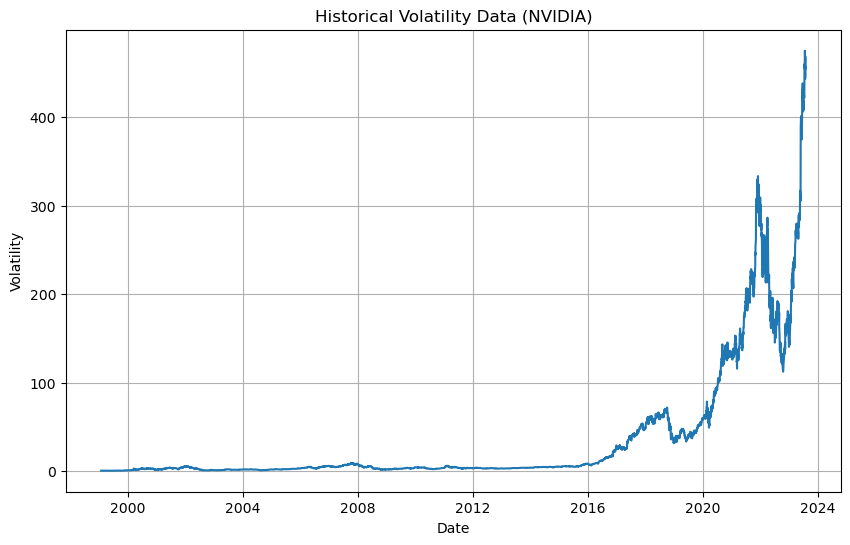

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(volatility_data.index, volatility_data['Close'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Historical Volatility Data (NVIDIA)')
plt.grid(True)

plt.show()

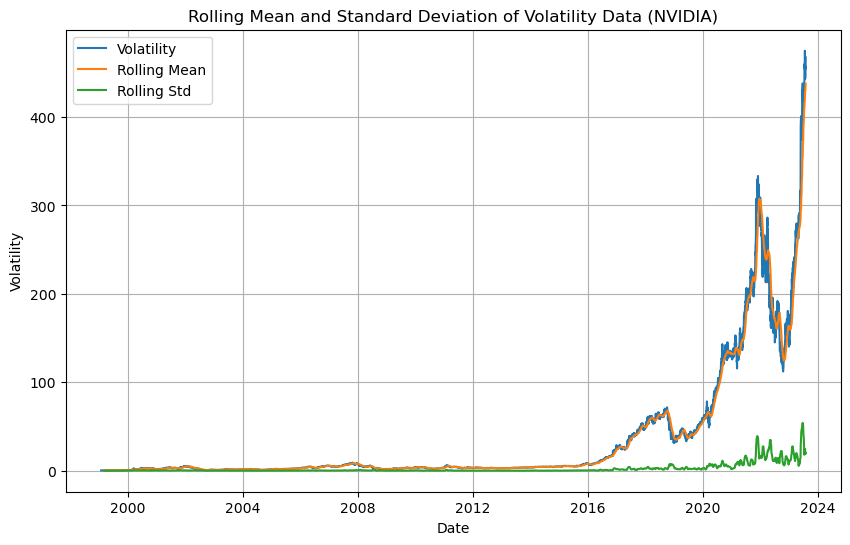

In [4]:
# Calculate the rolling mean and standard deviation
rolling_mean = volatility_data['Close'].rolling(window=30).mean()
rolling_std = volatility_data['Close'].rolling(window=30).std()

# Plot the rolling mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(volatility_data.index, volatility_data['Close'], label='Volatility')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean')
plt.plot(rolling_std.index, rolling_std, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Rolling Mean and Standard Deviation of Volatility Data (NVIDIA)')
plt.legend()
plt.grid(True)

plt.show()

In [5]:
returns = np.log(volatility_data['Close']).diff().dropna()
returns.shape

(6168,)

In [6]:
model = arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.8209517205966016e+20
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3575060605.570734
Iteration:      3,   Func. Count:     33,   Neg. LLF: 8.500387094917383e+20
Iteration:      4,   Func. Count:     48,   Neg. LLF: 407739728.6762384
Iteration:      5,   Func. Count:     63,   Neg. LLF: 8.47438754384373e+20
Iteration:      6,   Func. Count:     77,   Neg. LLF: -12275.717429526041
Optimization terminated successfully    (Exit mode 0)
            Current function value: -12275.717398279594
            Iterations: 10
            Function evaluations: 77
            Gradient evaluations: 6


In [7]:
# Estimate the volatility
volatility = results.conditional_volatility

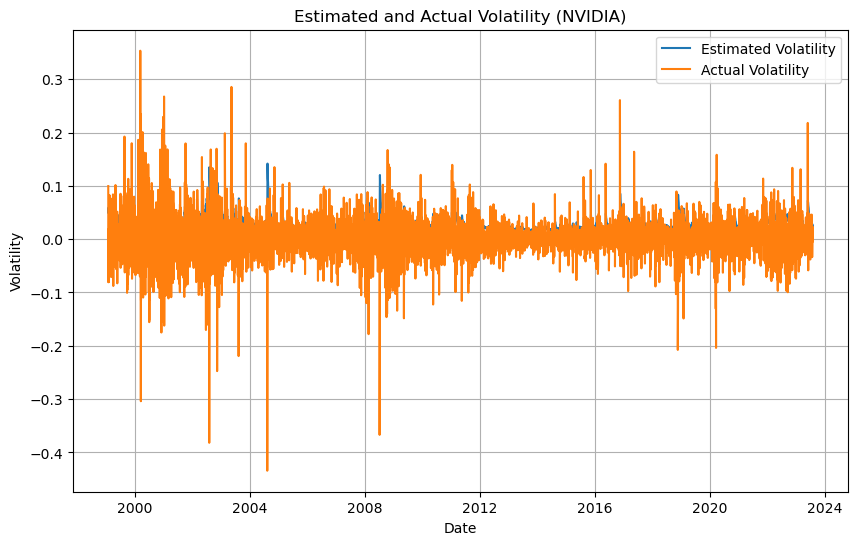

In [8]:
# Plot the estimated and actual volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility.index, volatility, label='Estimated Volatility')
plt.plot(returns.index, returns, label='Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Estimated and Actual Volatility (NVIDIA)')
plt.legend()
plt.grid(True)

plt.show()

The plot shows the estimated volatility (conditional variance) and the actual volatility (log returns) over time. 
It helps us assess the accuracy of the volatility estimates.

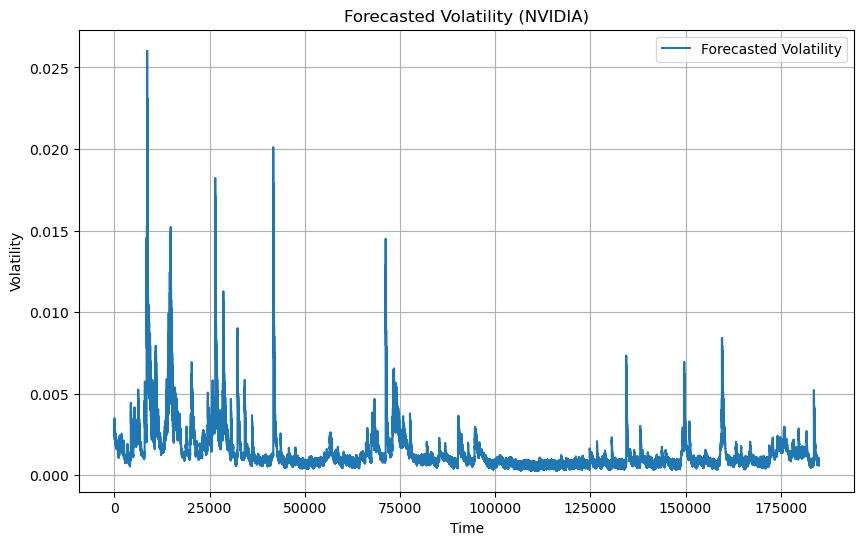

In [9]:
# Forecast the volatility
forecast = results.forecast(start=0, horizon=30)
forecast_volatility = forecast.variance.dropna().values.flatten()

# Plot the forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(forecast_volatility, label='Forecasted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Forecasted Volatility (NVIDIA)')
plt.legend()
plt.grid(True)

plt.show()

The plot displays the forecasted volatility for the next 30 periods. 
It provides insights into the expected future volatility based on the GARCH model.

In [10]:
# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(volatility - returns))
print('Mean Absolute Error (MAE):', mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((volatility - returns) ** 2))
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 0.039408246676872156
Root Mean Squared Error (RMSE): 0.05299661765033805


The MAE and RMSE provide measures of the average and overall forecast errors, respectively. 
Lower values indicate better model performance.

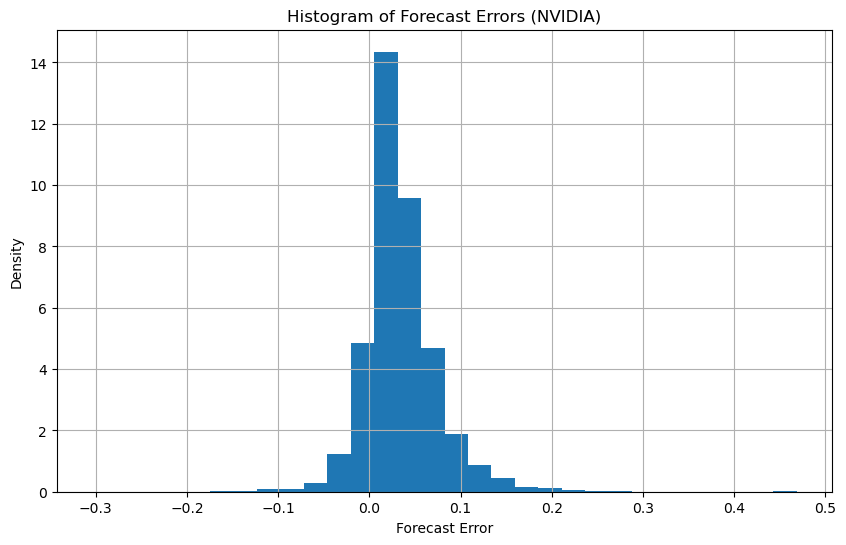

In [11]:
# Calculate the forecast errors
errors = volatility - returns

# Plot the histogram of forecast errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, density=True)
plt.xlabel('Forecast Error')
plt.ylabel('Density')
plt.title('Histogram of Forecast Errors (NVIDIA)')
plt.grid(True)

plt.show()